### BENFORD'S LAW

[Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law) is related to the frequency distribution of the leading digits of a collection of numbers occurring in the real world. The leading digit is the first digit of the number, so for 2346.78 it would be 2. According to Benford's law, the leading significant digit is more likely to be a small number. Since there are 9 possible digits, if all of them were to be equally likely to appear in the leading digit, we would expect each of them to have a probability of appearing of 0.111. However, Benford's law shows that the probabilities for the different digits are:

|  | 
--- | --- | ---
**Digits**| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 
**Probability** | 0.301 | 0.176 | 0.125 | 0.097 | 0.079 | 0.067 | 0.058 | 0.051 | 0.046


Benford's law has been shown to appear in multiple different data sets, from the stock market to the population of countries. The unit in which the data is measured does not matter as long as the data is spread over many orders of magnitude.


To show the validity of Benford's law it is applied here to the observations of the Keppler Space Telescope. The [test data set](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data) consists of over one million measurements of the light intensity of 570 stars. The different fluxes vary over many orders of magnitude and were collected with the objective of detecting exoplanets orbiting distant stars.

In [95]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

raw = []
with open("exoTest.txt") as f:
    for line in f:
        raw.append(line.split())  

The data is processed to obtain the leading significant digit of each measurement.

In [96]:
data = []

for i in range(len(raw)):
    for e in range(len(raw[i])):
        x = abs(float(raw[i][e]))
        data.append(x)

In [97]:
print(data[:100])

[119.88, 100.21, 86.46, 48.68, 46.12, 39.39, 18.57, 6.98, 6.63, 21.97, 23.17, 29.26, 33.99, 6.25, 28.12, 27.24, 32.28, 12.29, 16.57, 23.86, 5.69, 9.24, 35.52, 81.2, 116.49, 133.99, 148.97, 174.15, 187.77, 215.3, 246.8, 56.68, 56.68, 56.68, 52.05, 31.52, 31.15, 48.53, 38.93, 26.06, 6.63, 29.13, 64.7, 79.74, 12.21, 12.21, 19.94, 28.6, 20.54, 51.39, 22.06, 25.19, 21.59, 12.83, 23.44, 29.86, 23.36, 7.58, 13.74, 12.15, 13.87, 31.66, 28.52, 52.38, 49.17, 90.2, 90.92, 101.25, 18.63, 18.63, 17.73, 0.07, 9.35, 16.77, 22.06, 34.04, 36.12, 20.3, 34.39, 38.15, 39.48, 46.41, 35.29, 37.61, 31.8, 17.83, 11.92, 19.95, 39.26, 42.52, 42.29, 93.7, 10.37, 10.37, 9.49, 8.15, 12.5, 17.51, 16.88, 11.8]


In [98]:
first_digit = []

for i in range(len(data)):
    #x = minutes[i] // 10 **(int(math.log(minutes[i],10)))
    y = int(str(data[i])[0])
    first_digit.append(y)

print(first_digit[:100])

[1, 1, 8, 4, 4, 3, 1, 6, 6, 2, 2, 2, 3, 6, 2, 2, 3, 1, 1, 2, 5, 9, 3, 8, 1, 1, 1, 1, 1, 2, 2, 5, 5, 5, 5, 3, 3, 4, 3, 2, 6, 2, 6, 7, 1, 1, 1, 2, 2, 5, 2, 2, 2, 1, 2, 2, 2, 7, 1, 1, 1, 3, 2, 5, 4, 9, 9, 1, 1, 1, 1, 0, 9, 1, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 1, 1, 1, 3, 4, 4, 9, 1, 1, 9, 8, 1, 1, 1, 1]


The first one hundred leading digits are shown above. Once the leading digits are obtained, the total amounts of each digit can be calculated.

In [99]:
num = (1,2,3,4,5,6,7,8,9)
numbers = [0,0,0,0,0,0,0,0,0]

e = 0

for e in range(len(numbers)):
    e += 1
    for i in range(len(first_digit)):
        if first_digit[i] == e:
            numbers[e-1] += 1
        
print (numbers)

[514654, 292466, 214904, 172156, 141499, 119232, 101953, 86458, 74051]


So there are 514654 numbers with a one as the leading digit in the dataset. Numbers smaller than one, so starting with zero, have been omitted since they do not influence the result, but another option would have been to take the biggest decimal digit different than zero instead.

In [100]:
percent = []
t = sum(numbers)
for u in range(len(numbers)):
    p = round(numbers[u]/ t, 4)
    percent.append(p)
    
print(percent)
    

[0.2997, 0.1703, 0.1251, 0.1002, 0.0824, 0.0694, 0.0594, 0.0503, 0.0431]


Once the proportion of the appearance of each digit is calculated it can be compared with the theoretical result given by Benford's Law.

In [101]:
benfordlaw = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

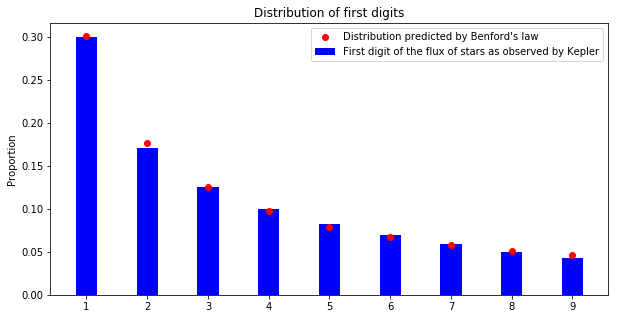

In [102]:
ind = np.arange(len(percent)) 
width = 0.35
nums = (0,1,2,3,4,5,6,7,8)
fig, ax = plt.subplots()
rects1 = ax.bar(ind, percent, width,
                color='Blue', label='First digit of the flux of stars as observed by Kepler')
plt.plot(nums, benfordlaw, "ro", label="Distribution predicted by Benford's law")
ax.set_ylabel('Proportion')
ax.set_title('Distribution of first digits')
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))
ax.legend()
fig.set_size_inches(10, 5)

The dataset is extremely close to the results predicted by Benford's Law. To find out the explanation behind the law visit [Wikipedia](https://en.wikipedia.org/wiki/Benford%27s_law#Examples_and_explanations) or, in more detail, [A Simple Explanation of Benford's Law](https://www.stat.auckland.ac.nz/~fewster/RFewster_Benford.pdf) and [Explaining Benford's Law](http://www.dspguide.com/CH34.PDF).